# Project: Wrangling and Analyze Data

## Table of content

<ul>
<li><a href="#gather">Data Gathering</a></li>
<li><a href="#assess">Assessing Data</a></li>
<li><a href="#qi">Data Quality Issues</a></li>
<li><a href="#ti">Data Tidiness Issues</a></li>
<li><a href="#clean">Data Cleaning</a></li>
<li><a href="#store">Storing Data</a></li>
<li><a href="#viz">Analyzing and Visualizing Data</a></li>
</ul>

<a id='gather'></a>
## Data Gathering
1. Directly download the WeRateDogs Twitter archive data (twitter_archive_enhanced.csv)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import requests


%matplotlib inline

In [188]:
# load the first dataset: twitter-archive-enhanced.csv
twitter_archive_df= pd.read_csv("twitter-archive-enhanced.csv")

In [18]:
#view dataset
twitter_archive_df.head(10)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


2. Use the Requests library to download the tweet image prediction (image_predictions.tsv)

In [3]:
# load the Second dataset using the URL provided in the "project:gathering data" page

# download the image prediction file
url = "https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv"
response = requests.get(url)

# save file 
with open("image-predictions.tsv", mode = 'wb') as file:
    file.write(response.content)

# load the file
img_prediction_df = pd.read_csv('image-predictions.tsv', sep = '\t')

In [4]:
# view data
img_prediction_df.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


3. Use the Tweepy library to query additional data via the Twitter API (tweet_json.txt)

In [ ]:
# this is the Twitter API code to gather some of the required data for the project provided by udacity

import tweepy
from tweepy import OAuthHandler
import json
from timeit import default_timer as timer

# Query Twitter API for each tweet in the Twitter archive and save JSON in a text file
# These are hidden to comply with Twitter's API terms and conditions
consumer_key = 'HIDDEN'
consumer_secret = 'HIDDEN'
access_token = 'HIDDEN'
access_secret = 'HIDDEN'

auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)

# NOTE TO STUDENT WITH MOBILE VERIFICATION ISSUES:
# df_1 is a DataFrame with the twitter_archive_enhanced.csv file. You may have to
# change line 17 to match the name of your DataFrame with twitter_archive_enhanced.csv
# NOTE TO REVIEWER: this student had mobile verification issues so the following
# Twitter API code was sent to this student from a Udacity instructor
# Tweet IDs for which to gather additional data via Twitter's API
tweet_ids = twitter_archive_df.tweet_id.values
len(tweet_ids)

# Query Twitter's API for JSON data for each tweet ID in the Twitter archive
count = 0
fails_dict = {}
start = timer()
# Save each tweet's returned JSON as a new line in a .txt file
with open('tweet_json.txt', 'w') as outfile:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.TweepError as e:
            print("Fail")
            fails_dict[tweet_id] = e
            pass
end = timer()
print(end - start)
print(fails_dict)

In [7]:
tweets = []

text_file = open('tweet_json.txt', "r")

for n in text_file:
    try:
        tweet_n = json.loads(n)
        tweets.append(tweet_n)
    except:
        continue
        
text_file.close()

tweet_data = pd.DataFrame()

tweet_data['tweet_id'] = list(map(lambda tweetr: tweetr['id'], tweets))
tweet_data['retweet_count'] = list(map(lambda tweetr: tweetr['retweet_count'], tweets))
tweet_data['favorite_count'] = list(map(lambda tweetr: tweetr['favorite_count'], tweets))
tweet_data['full_text'] = list(map(lambda tweetr: tweetr['full_text'], tweets))

In [8]:
tweet_data.head()

,tweet_id,retweet_count,favorite_count,full_text
0,892420643555336193,8853,39467,This is Phineas. He's a mystical boy. Only eve...
1,892177421306343426,6514,33819,This is Tilly. She's just checking pup on you....
2,891815181378084864,4328,25461,This is Archie. He is a rare Norwegian Pouncin...
3,891689557279858688,8964,42908,This is Darla. She commenced a snooze mid meal...
4,891327558926688256,9774,41048,This is Franklin. He would like you to stop ca...


In [55]:
tweet_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
tweet_id          2354 non-null int64
retweet_count     2354 non-null int64
favorite_count    2354 non-null int64
dtypes: int64(3)
memory usage: 55.2 KB


<a id='assess'></a>
## Assessing Data


### Data WeRateDogs Twitter archive

In [29]:
#view data
twitter_archive_df

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f",NaN,NaN,NaN,"https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12,10,Franklin,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here we have a 1949 1st generation vulpix. Enjoys sweat tea and Fox News. Cannot be phased. 5/10 https://t.co/4B7cOc1EDq,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248165822465/photo/1,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is a purebred Piers Morgan. Loves to Netflix and chill. Always looks like he forgot to unplug the iron. 6/10 https://t.co/DWnyCjf2mx,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226329800704/photo/1,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here is a very happy pup. Big fan of well-maintained decks. Just look at that tongue. 9/10 would cuddle af https://t.co/y671yMhoiR,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412701032449/photo/1,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is a western brown Mitsubishi terrier. Upset about leaf. Actually 2 dogs here. 7/10 would walk the shit out of https://t.co/r7mOb2m0UI,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285002620928/photo/1,7,10,a,None,None,None,None


In [26]:
#accessing the data
twitter_archive_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [28]:
#checking the number of rows and columns
twitter_archive_df.shape

(2356, 17)

In [29]:
#investigating missingness
twitter_archive_df.isna().sum()

tweet_id                         0
in_reply_to_status_id         2278
in_reply_to_user_id           2278
timestamp                        0
source                           0
text                             0
retweeted_status_id           2175
retweeted_status_user_id      2175
retweeted_status_timestamp    2175
expanded_urls                   59
rating_numerator                 0
rating_denominator               0
name                             0
doggo                            0
floofer                          0
pupper                           0
puppo                            0
dtype: int64

In [31]:
# checking for dupplicate records
twitter_archive_df.duplicated().sum()

0

In [48]:
# investigating dog names
names_lower = twitter_archive_df.name.str.contains('^[a-z]', regex = True)
twitter_archive_df[names_lower].name.value_counts().sort_index()

22       such
56          a
118     quite
169     quite
193     quite
        ...  
2349       an
2350        a
2352        a
2353        a
2354        a
Name: name, Length: 109, dtype: object

In [48]:
# dogs that are doggo
twitter_archive_df.groupby('doggo')['doggo'].count()

doggo
None     2259
doggo      97
Name: doggo, dtype: int64

In [49]:
# dogs that are floofer
twitter_archive_df.groupby('floofer')['floofer'].count()

floofer
None       2346
floofer      10
Name: floofer, dtype: int64

In [50]:
# dogs that are pupper
twitter_archive_df.groupby('pupper')['pupper'].count()

pupper
None      2099
pupper     257
Name: pupper, dtype: int64

In [51]:
# dogs that are puppo
twitter_archive_df.groupby('puppo')['puppo'].count()

puppo
None     2326
puppo      30
Name: puppo, dtype: int64

In [61]:
# number of dogs with name = none

twitter_archive_df.loc[twitter_archive_df['name']=='None']['name'].count()

745

In [10]:
# checking dogs that have more than one stages
pd.crosstab(twitter_archive_df['doggo'],[twitter_archive_df['floofer'], twitter_archive_df['pupper'],twitter_archive_df['puppo']])

#twitter_archive_df.groupby(['doggo','floofer','pupper','puppo']).size().reset_index() ---- another method to check for the occurences of multiple stages

floofer  None              floofer
pupper   None       pupper    None
puppo    None puppo   None    None
doggo                             
None     1976    29    245       9
doggo      83     1     12       1

In [69]:
# investigating rating_denominators
twitter_archive_df.rating_denominator.value_counts()

10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

In [24]:
# checcking text to investigate denominator ratings that are not equal to 10
pd.set_option('display.max_colwidth', None)
twitter_archive_df.loc[twitter_archive_df.rating_denominator !=10][['text','rating_denominator']]

,text,rating_denominator
313,"@jonnysun @Lin_Manuel ok jomny I know you're excited but 960/00 isn't a valid rating, 13/10 is tho",0
342,@docmisterio account started on 11/15/15,15
433,The floofs have been released I repeat the floofs have been released. 84/70 https://t.co/NIYC820tmd,70
516,Meet Sam. She smiles 24/7 &amp; secretly aspires to be a reindeer. \nKeep Sam smiling by clicking and sharing this link:\nhttps://t.co/98tB8y7y7t https://t.co/LouL5vdvxx,7
784,"RT @dog_rates: After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https:/…",11
902,Why does this never happen at my front door... 165/150 https://t.co/HmwrdfEfUE,150
1068,"After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https://t.co/XAVDNDaVgQ",11
1120,Say hello to this unbelievably well behaved squad of doggos. 204/170 would try to pet all at once https://t.co/yGQI3He3xv,170
1165,Happy 4/20 from the squad! 13/10 for all https://t.co/eV1diwds8a,20
1202,This is Bluebert. He just saw that both #FinalFur match ups are split 50/50. Amazed af. 11/10 https://t.co/Kky1DPG4iq,50


In [30]:
#investigatin the tweet source column

twitter_archive_df.source.value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2221
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       33
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

### Data tweet image predictions

In [23]:
#view data
img_prediction_df

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True


In [24]:
img_prediction_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [25]:
# check for dupplicate records
img_prediction_df.duplicated().sum()

0

In [29]:
#checking for missingness
img_prediction_df.isna().sum()

tweet_id    0
jpg_url     0
img_num     0
p1          0
p1_conf     0
p1_dog      0
p2          0
p2_conf     0
p2_dog      0
p3          0
p3_conf     0
p3_dog      0
dtype: int64

In [32]:
#checking that confidence of p1, p2 and p3 are not greater than 1
img_prediction_df.loc[(img_prediction_df['p1_conf']>1)|(img_prediction_df['p2_conf']>1)|(img_prediction_df['p3_conf']>1)].shape

(0, 12)

In [33]:
#checking categories within column
img_prediction_df.p1_dog.value_counts()

True     1532
False     543
Name: p1_dog, dtype: int64

In [34]:
#checking categories within column
img_prediction_df.p2_dog.value_counts()

True     1553
False     522
Name: p2_dog, dtype: int64

In [35]:
#checking categories within column
img_prediction_df.p3_dog.value_counts()

True     1499
False     576
Name: p3_dog, dtype: int64

### Data tweet JSON

In [18]:
#view data
tweet_data

,tweet_id,retweet_count,favorite_count,full_text
0,892420643555336193,8853,39467,This is Phineas. He's a mystical boy. Only eve...
1,892177421306343426,6514,33819,This is Tilly. She's just checking pup on you....
2,891815181378084864,4328,25461,This is Archie. He is a rare Norwegian Pouncin...
3,891689557279858688,8964,42908,This is Darla. She commenced a snooze mid meal...
4,891327558926688256,9774,41048,This is Franklin. He would like you to stop ca...
5,891087950875897856,3261,20562,Here we have a majestic great white breaching ...
6,890971913173991426,2158,12041,Meet Jax. He enjoys ice cream so much he gets ...
7,890729181411237888,16716,56848,When you watch your owner call another dog a g...
8,890609185150312448,4429,28226,This is Zoey. She doesn't want to be one of th...
9,890240255349198849,7711,32467,This is Cassie. She is a college pup. Studying...


In [19]:
tweet_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 4 columns):
tweet_id          2354 non-null int64
retweet_count     2354 non-null int64
favorite_count    2354 non-null int64
full_text         2354 non-null object
dtypes: int64(3), object(1)
memory usage: 73.6+ KB


In [20]:
#checking for duplicates
tweet_data.duplicated().sum()

0

<a id='qi'></a>
### Data Quality issues
1. There are inconsistences in the naming of dogs, It appears that dog names were retrieved from the "text" column from statments like "this is ..." what ever appears after "is" is taken as the dog name, hence the reason we have names like "a, the","infuriating" etc

2. There are alot lot of missing data labelled as "None", in the "name", "doggo", "floofer", "pupper" and "puppo" columns. for example, There are 745 dogs with the name "None"

3. The timestamp datatype is incorrect

4. There are a few records with rating_denominators not equal to 10, by manually reading their text, I discovered that some of these ratings are actually valid, while some are invalid, therefore both numerator and denominator ratings of invalid entries will be corrected

5. Columns such as "in_reply_to_status_id", "in_reply_to_user_id", contain too many null values, should be dropped

6. The tweet source contain the direct source (eg, iphone for twitter, tweetdeck etc) wrapped within the url. They column should be pared to show just the direcct source.

7. Irregular casing in columns p1,p2, and p3 some have camel cases while others have lower casing

8. Drop "text" column, since we now have a "full_text" column from the twitter API data

9. Non-null retweet rows, from 3 retweet columns in the dataframe were found,this essentially duplicates the actual tweets and so they may skew the result of the analysis, both columns and rows will be dropped

10. The 3 retweet columns ("retweeted_status_id", "retweeted_status_timestamp", "retweeted_status_user_id"), whose non-null rows are removed from above will be left with only null values in their columns. Drop columns


<a id='ti'></a>
### Data Tidiness issues
1. The three dataset contain information about one observational unit. They should be merged into one, as they are part of the same observational unit
2. The dog stages are spread into four columns. They should be put into one column.

<a id='clean'></a>
## Cleaning Data

### Tidiness Issue #1: The three dataset contain information about one observational unit. They should be merged into one, as they are part of the same observational unit

In [189]:
# merging the three dataset
full_df=pd.merge(twitter_archive_df,img_prediction_df, on='tweet_id', how='inner')\
    .merge(tweet_data, on='tweet_id', how='inner')

In [190]:
full_df

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,retweet_count,favorite_count,full_text
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643555336193/photo/1,...,False,bagel,0.085851,False,banana,0.076110,False,8853,39467,This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421306343426/photo/1,...,True,Pekinese,0.090647,True,papillon,0.068957,True,6514,33819,"This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV"
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181378084864/photo/1,...,True,malamute,0.078253,True,kelpie,0.031379,True,4328,25461,This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557279858688/photo/1,...,False,Labrador_retriever,0.168086,True,spatula,0.040836,False,8964,42908,This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f",NaN,NaN,NaN,"https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",...,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True,9774,41048,"This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2068,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here we have a 1949 1st generation vulpix. Enjoys sweat tea and Fox News. Cannot be phased. 5/10 https://t.co/4B7cOc1EDq,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248165822465/photo/1,...,True,Rottweiler,0.243682,True,Doberman,0.154629,True,41,111,Here we have a 1949 1st generation vulpix. Enjoys sweat tea and Fox News. Cannot be phased. 5/10 https://t.co/4B7cOc1EDq
2069,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is a purebred Piers Morgan. Loves to Netflix and chill. Always looks li

In [406]:
# Make copies of original pieces of data

copy_df= full_df.copy()

In [34]:
copy_df.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,retweet_count,favorite_count,full_text
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,...,False,bagel,0.085851,False,banana,0.076110,False,8853,39467,This is Phineas. He's a mystical boy. Only eve...
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,...,True,Pekinese,0.090647,True,papillon,0.068957,True,6514,33819,This is Tilly. She's just checking pup on you....
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,...,True,malamute,0.078253,True,kelpie,0.031379,True,4328,25461,This is Archie. He is a rare Norwegian Pouncin...
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,...,False,Labrador_retriever,0.168086,True,spatula,0.040836,False,8964,42908,This is Darla. She commenced a snooze mid meal...
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,...,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True,9774,41048,This is Franklin. He would like you to stop ca...


In [35]:
copy_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2073 entries, 0 to 2072
Data columns (total 31 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2073 non-null   int64  
 1   in_reply_to_status_id       23 non-null     float64
 2   in_reply_to_user_id         23 non-null     float64
 3   timestamp                   2073 non-null   object 
 4   source                      2073 non-null   object 
 5   text                        2073 non-null   object 
 6   retweeted_status_id         79 non-null     float64
 7   retweeted_status_user_id    79 non-null     float64
 8   retweeted_status_timestamp  79 non-null     object 
 9   expanded_urls               2073 non-null   object 
 10  rating_numerator            2073 non-null   int64  
 11  rating_denominator          2073 non-null   int64  
 12  name                        2073 non-null   object 
 13  doggo                       2073 

### Issue #1: There are inconsistences in the naming of dogs, It appears that dog names were retrieved from the "text" column from statments like "this is ..." what ever appears after "is" is taken as the dog name, hence the reason we have names like "a, the","infuriating" etc

#### Define: Replace incorrect names with nan

#### Code

In [407]:
# incorrect names like "is","infuriating" within the name column have lowercase character,
names_lower=copy_df.name.str.contains('^[a-z]', regex = True)
wrong_names=copy_df[names_lower].name
wrong_names

21       such
50          a
141     quite
155     quite
293       one
        ...  
2066       an
2067        a
2069        a
2070        a
2071        a
Name: name, Length: 100, dtype: object

In [207]:
#count of rows with incorrect names
wrong_names.count()

100

In [208]:
#checking sum of name rows with nan, before cleaning
copy_df.name.isna().sum()

0

In [408]:
#converting incorrect names to a list without dupplicates

wrong_names = list(set(wrong_names))
wrong_names

['getting',
 'not',
 'an',
 'infuriating',
 'by',
 'this',
 'his',
 'quite',
 'unacceptable',
 'all',
 'my',
 'just',
 'incredibly',
 'officially',
 'such',
 'space',
 'light',
 'the',
 'a',
 'one',
 'actually',
 'very']

In [409]:
#replacing all occurences of incorrect names list in "wrong_names" with nan
copy_df.name = copy_df.name.replace(wrong_names,np.nan)

#### Test

In [410]:
#checking the count of nan in column "name"
copy_df.name.isna().sum()

100

In [411]:
#count of rows with lowercase names (incorrect names)
copy_df[names_lower].name.count()

0

In [412]:
copy_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2073 entries, 0 to 2072
Data columns (total 31 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2073 non-null   int64  
 1   in_reply_to_status_id       23 non-null     float64
 2   in_reply_to_user_id         23 non-null     float64
 3   timestamp                   2073 non-null   object 
 4   source                      2073 non-null   object 
 5   text                        2073 non-null   object 
 6   retweeted_status_id         79 non-null     float64
 7   retweeted_status_user_id    79 non-null     float64
 8   retweeted_status_timestamp  79 non-null     object 
 9   expanded_urls               2073 non-null   object 
 10  rating_numerator            2073 non-null   int64  
 11  rating_denominator          2073 non-null   int64  
 12  name                        1973 non-null   object 
 13  doggo                       2073 

### Issue #2: There are alot lot of missing data labelled as "None", in the "name", "doggo", "floofer", "pupper" and "puppo" columns. for example, There are 745 dogs with the name "None"

#### Define: Replace values labelled as "None" with NaN

#### Code

In [413]:
# replacing "None" with nan in the name, doggo, floofer, pupper, puppo columns
copy_df.replace({'name':{'None':np.nan},'doggo':{'None':np.nan},'floofer':{'None':np.nan},'pupper':{'None':np.nan},'puppo':{'None':np.nan}}, inplace=True)

#### Test

In [414]:
copy_df.isna().sum()

tweet_id                         0
in_reply_to_status_id         2050
in_reply_to_user_id           2050
timestamp                        0
source                           0
text                             0
retweeted_status_id           1994
retweeted_status_user_id      1994
retweeted_status_timestamp    1994
expanded_urls                    0
rating_numerator                 0
rating_denominator               0
name                           677
doggo                         1993
floofer                       2065
pupper                        1852
puppo                         2049
jpg_url                          0
img_num                          0
p1                               0
p1_conf                          0
p1_dog                           0
p2                               0
p2_conf                          0
p2_dog                           0
p3                               0
p3_conf                          0
p3_dog                           0
retweet_count       

In [415]:
copy_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2073 entries, 0 to 2072
Data columns (total 31 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2073 non-null   int64  
 1   in_reply_to_status_id       23 non-null     float64
 2   in_reply_to_user_id         23 non-null     float64
 3   timestamp                   2073 non-null   object 
 4   source                      2073 non-null   object 
 5   text                        2073 non-null   object 
 6   retweeted_status_id         79 non-null     float64
 7   retweeted_status_user_id    79 non-null     float64
 8   retweeted_status_timestamp  79 non-null     object 
 9   expanded_urls               2073 non-null   object 
 10  rating_numerator            2073 non-null   int64  
 11  rating_denominator          2073 non-null   int64  
 12  name                        1396 non-null   object 
 13  doggo                       80 no

### Issue #3: The timestamp datatype is incorrect

#### Define: Convert timestamp to datetime dataype

#### Code

In [416]:
copy_df['timestamp']= pd.to_datetime(copy_df['timestamp'])

#### Test

In [417]:
copy_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2073 entries, 0 to 2072
Data columns (total 31 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   tweet_id                    2073 non-null   int64              
 1   in_reply_to_status_id       23 non-null     float64            
 2   in_reply_to_user_id         23 non-null     float64            
 3   timestamp                   2073 non-null   datetime64[ns, UTC]
 4   source                      2073 non-null   object             
 5   text                        2073 non-null   object             
 6   retweeted_status_id         79 non-null     float64            
 7   retweeted_status_user_id    79 non-null     float64            
 8   retweeted_status_timestamp  79 non-null     object             
 9   expanded_urls               2073 non-null   object             
 10  rating_numerator            2073 non-null   int64           

### Issue #4: There are a few records with rating_denominators not equal to 10, by manually reading their text, I discovered that some of these ratings are actually valid, while some are invalid, therefore both numerator and denominator ratings of invalid entries will be corrected

#### Define: Correct Invalid rating_denominator entries with their coresponding numerators

#### Code

In [418]:
copy_df.loc[copy_df.rating_denominator != 10][['tweet_id','full_text','rating_numerator','rating_denominator']]

,tweet_id,full_text,rating_numerator,rating_denominator
345,820690176645140481,The floofs have been released I repeat the floofs have been released. 84/70 https://t.co/NIYC820tmd,84,70
415,810984652412424192,Meet Sam. She smiles 24/7 &amp; secretly aspires to be a reindeer. \nKeep Sam smiling by clicking and sharing this link:\nhttps://t.co/98tB8y7y7t https://t.co/LouL5vdvxx,24,7
734,758467244762497024,Why does this never happen at my front door... 165/150 https://t.co/HmwrdfEfUE,165,150
876,740373189193256964,"After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https://t.co/XAVDNDaVgQ",9,11
924,731156023742988288,Say hello to this unbelievably well behaved squad of doggos. 204/170 would try to pet all at once https://t.co/yGQI3He3xv,204,170
967,722974582966214656,Happy 4/20 from the squad! 13/10 for all https://t.co/eV1diwds8a,4,20
1001,716439118184652801,This is Bluebert. He just saw that both #FinalFur match ups are split 50/50. Amazed af. 11/10 https://t.co/Kky1DPG4iq,50,50
1022,713900603437621249,Happy Saturday here's 9 puppers on a bench. 99/90 good work everybody https://t.co/mpvaVxKmc1,99,90
1047,710658690886586372,Here's a brigade of puppers. All look very prepared for whatever happens next. 80/80 https://t.co/0eb7R1Om12,80,80
1065,709198395643068416,"From left to right:\nCletus, Jerome, Alejandro, Burp, &amp; Titson\nNone know where camera is. 45/50 would hug all at once https://t.co/sedre1ivTK",45,50


In [419]:
#creating a function to replace column values based on tweet_id column condition
def multi(t_id, repl,con_col, repl_col):
    repl_col.mask(con_col == t_id ,repl, inplace=True)


# correcting invalid entries using thier tweet ids
multi(810984652412424192, np.nan, copy_df.tweet_id, copy_df.rating_numerator)
multi(810984652412424192, np.nan, copy_df.tweet_id, copy_df.rating_denominator)

multi(740373189193256964, 14, copy_df.tweet_id, copy_df.rating_numerator)
multi(740373189193256964, 10, copy_df.tweet_id, copy_df.rating_denominator)

multi(716439118184652801, 11, copy_df.tweet_id, copy_df.rating_numerator)
multi(716439118184652801, 10, copy_df.tweet_id, copy_df.rating_denominator)

multi(682962037429899265, 10, copy_df.tweet_id, copy_df.rating_numerator)
multi(682962037429899265, 10, copy_df.tweet_id, copy_df.rating_denominator)

multi(666287406224695296, 9, copy_df.tweet_id, copy_df.rating_numerator)
multi(666287406224695296, 10, copy_df.tweet_id, copy_df.rating_denominator)


#### Test

In [420]:
#checking to see if ratings are now properly inputed
copy_df.loc[copy_df.rating_denominator != 10][['tweet_id','full_text','rating_numerator','rating_denominator']]

,tweet_id,full_text,rating_numerator,rating_denominator
345,820690176645140481,The floofs have been released I repeat the floofs have been released. 84/70 https://t.co/NIYC820tmd,84.0,70.0
415,810984652412424192,Meet Sam. She smiles 24/7 &amp; secretly aspires to be a reindeer. \nKeep Sam smiling by clicking and sharing this link:\nhttps://t.co/98tB8y7y7t https://t.co/LouL5vdvxx,NaN,NaN
734,758467244762497024,Why does this never happen at my front door... 165/150 https://t.co/HmwrdfEfUE,165.0,150.0
924,731156023742988288,Say hello to this unbelievably well behaved squad of doggos. 204/170 would try to pet all at once https://t.co/yGQI3He3xv,204.0,170.0
967,722974582966214656,Happy 4/20 from the squad! 13/10 for all https://t.co/eV1diwds8a,4.0,20.0
1022,713900603437621249,Happy Saturday here's 9 puppers on a bench. 99/90 good work everybody https://t.co/mpvaVxKmc1,99.0,90.0
1047,710658690886586372,Here's a brigade of puppers. All look very prepared for whatever happens next. 80/80 https://t.co/0eb7R1Om12,80.0,80.0
1065,709198395643068416,"From left to right:\nCletus, Jerome, Alejandro, Burp, &amp; Titson\nNone know where camera is. 45/50 would hug all at once https://t.co/sedre1ivTK",45.0,50.0
1131,704054845121142784,Here is a whole flock of puppers. 60/50 I'll take the lot https://t.co/9dpcw6MdWa,60.0,50.0
1207,697463031882764288,Happy Wednesday here's a bucket of pups. 44/40 would pet all at once https://t.co/HppvrYuamZ,44.0,40.0


In [421]:
copy_df.info() #ratings column automatically converted to float cause of nan values

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2073 entries, 0 to 2072
Data columns (total 31 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   tweet_id                    2073 non-null   int64              
 1   in_reply_to_status_id       23 non-null     float64            
 2   in_reply_to_user_id         23 non-null     float64            
 3   timestamp                   2073 non-null   datetime64[ns, UTC]
 4   source                      2073 non-null   object             
 5   text                        2073 non-null   object             
 6   retweeted_status_id         79 non-null     float64            
 7   retweeted_status_user_id    79 non-null     float64            
 8   retweeted_status_timestamp  79 non-null     object             
 9   expanded_urls               2073 non-null   object             
 10  rating_numerator            2072 non-null   float64         

### Issue #5: Columns such as "in_reply_to_status_id", "in_reply_to_user_id", contain too many null values, should be dropped

#### Define: Drop columns that contain high null values

#### Code

In [422]:
#dropping columns
copy_df.drop(['in_reply_to_status_id','in_reply_to_user_id'], axis=1, inplace=True)

#### Test

In [423]:
copy_df.info()
#columns successfully dropped

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2073 entries, 0 to 2072
Data columns (total 29 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   tweet_id                    2073 non-null   int64              
 1   timestamp                   2073 non-null   datetime64[ns, UTC]
 2   source                      2073 non-null   object             
 3   text                        2073 non-null   object             
 4   retweeted_status_id         79 non-null     float64            
 5   retweeted_status_user_id    79 non-null     float64            
 6   retweeted_status_timestamp  79 non-null     object             
 7   expanded_urls               2073 non-null   object             
 8   rating_numerator            2072 non-null   float64            
 9   rating_denominator          2072 non-null   float64            
 10  name                        1396 non-null   object          

### Issue #6: The tweet source contain the direct source (eg, iphone for twitter, tweetdeck etc) wrapped within the url. They column should be parsed to show just the direcct source

#### Define: Parse source column and retrive only the direct source, not the url link

#### Code

In [424]:
copy_df.source.value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2032
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       30
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

In [425]:
#create a regex that extracts string within the tag <> and the replace it into the source column
copy_df.source=copy_df.source.str.extract('(<a href="https?)(:\/\/)(.+)(">)(.+)(<\/a>)', expand=True)[4]

#### Test

In [426]:
copy_df.source.value_counts()

Twitter for iPhone    2032
Twitter Web Client      30
TweetDeck               11
Name: source, dtype: int64

### Issue #7: Irregular casing in columns values of p1,p2, and p3 some have camel cases while others have lower casing

#### Define: Convert column values to lowercase

#### Code

In [427]:
copy_df['p1'] = copy_df['p1'].str.lower()
copy_df['p2'] = copy_df['p2'].str.lower()
copy_df['p3'] = copy_df['p3'].str.lower()

#### Test

In [428]:
copy_df['p1'].str.islower().sum()

2073

In [394]:
copy_df['p2'].str.islower().sum()

2073

In [395]:
copy_df['p2'].str.islower().sum()

2073

### Issue #8: Dupplicate Columns; drop "text" column, since we now have a "full_text" column from the twitter API data

#### Define: Drop "text" column

#### Code

In [429]:
copy_df.drop('text', axis=1, inplace=True)

#### Test

In [430]:
copy_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2073 entries, 0 to 2072
Data columns (total 28 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   tweet_id                    2073 non-null   int64              
 1   timestamp                   2073 non-null   datetime64[ns, UTC]
 2   source                      2073 non-null   object             
 3   retweeted_status_id         79 non-null     float64            
 4   retweeted_status_user_id    79 non-null     float64            
 5   retweeted_status_timestamp  79 non-null     object             
 6   expanded_urls               2073 non-null   object             
 7   rating_numerator            2072 non-null   float64            
 8   rating_denominator          2072 non-null   float64            
 9   name                        1396 non-null   object             
 10  doggo                       80 non-null     object          

### Issue #9: Non-null retweet rows, from 3 retweet columns in the dataframe were found,this essentially duplicates the actual tweets and so they may skew the result of the analysis, both columns and rows will be dropped

#### Define: Drop retweet rows

#### Code

In [431]:
#drop retweet rows from dataframe
copy_df=copy_df.loc[copy_df.retweeted_status_id.isna()]

#### Test

In [432]:
copy_df.info()
#retweet columns now have no values

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1994 entries, 0 to 2072
Data columns (total 28 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   tweet_id                    1994 non-null   int64              
 1   timestamp                   1994 non-null   datetime64[ns, UTC]
 2   source                      1994 non-null   object             
 3   retweeted_status_id         0 non-null      float64            
 4   retweeted_status_user_id    0 non-null      float64            
 5   retweeted_status_timestamp  0 non-null      object             
 6   expanded_urls               1994 non-null   object             
 7   rating_numerator            1993 non-null   float64            
 8   rating_denominator          1993 non-null   float64            
 9   name                        1350 non-null   object             
 10  doggo                       74 non-null     object          

### Issue #10: The 3 retweet columns ("retweeted_status_id", "retweeted_status_timestamp", "retweeted_status_user_id"), whose non-null rows are removed from above will be left with only null values in their columns. Drop columns 

#### Define: Drop retweet columns

#### Code

In [433]:
copy_df = copy_df.drop(["retweeted_status_id", "retweeted_status_timestamp", "retweeted_status_user_id"], axis=1)

#### Test

In [434]:
copy_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1994 entries, 0 to 2072
Data columns (total 25 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            1994 non-null   int64              
 1   timestamp           1994 non-null   datetime64[ns, UTC]
 2   source              1994 non-null   object             
 3   expanded_urls       1994 non-null   object             
 4   rating_numerator    1993 non-null   float64            
 5   rating_denominator  1993 non-null   float64            
 6   name                1350 non-null   object             
 7   doggo               74 non-null     object             
 8   floofer             8 non-null      object             
 9   pupper              212 non-null    object             
 10  puppo               23 non-null     object             
 11  jpg_url             1994 non-null   object             
 12  img_num             1994 non-null 

### Tidiness issue #2: The dog stages are spread into four columns. They should be put into one column.

#### Define: Merge columns into one "stages"

#### Code

In [435]:
#merge columns into one
copy_df['stages']= copy_df[['doggo','floofer','pupper','puppo']].apply(lambda x: ','.join(x.dropna()), axis=1)

In [436]:
#replace "" with nan
copy_df.replace({"stages":{"":np.nan}}, inplace=True)

In [437]:
#drop doggo, floofer, pupper and puppo columns
copy_df.drop(['doggo','floofer','pupper','puppo'], axis=1, inplace=True)

#### Test

In [438]:
copy_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1994 entries, 0 to 2072
Data columns (total 22 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            1994 non-null   int64              
 1   timestamp           1994 non-null   datetime64[ns, UTC]
 2   source              1994 non-null   object             
 3   expanded_urls       1994 non-null   object             
 4   rating_numerator    1993 non-null   float64            
 5   rating_denominator  1993 non-null   float64            
 6   name                1350 non-null   object             
 7   jpg_url             1994 non-null   object             
 8   img_num             1994 non-null   int64              
 9   p1                  1994 non-null   object             
 10  p1_conf             1994 non-null   float64            
 11  p1_dog              1994 non-null   bool               
 12  p2                  1994 non-null 

<a id='store'></a>
## Storing Data
Save gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv".

In [439]:
copy_df.to_csv("twitter_archive_master.csv", index=False)

<a id='viz'></a>
## Analyzing and Visualizing Data
In this section, analyze and visualize your wrangled data. You must produce at least **three (3) insights and one (1) visualization.**

In [440]:
df = pd.read_csv('twitter_archive_master.csv')
df

,tweet_id,timestamp,source,expanded_urls,rating_numerator,rating_denominator,name,jpg_url,img_num,p1,...,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,retweet_count,favorite_count,full_text,stages
0,892420643555336193,2017-08-01 16:23:56+00:00,Twitter for iPhone,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13.0,10.0,Phineas,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,orange,...,bagel,0.085851,False,banana,0.076110,False,8853,39467,This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,NaN
1,892177421306343426,2017-08-01 00:17:27+00:00,Twitter for iPhone,https://twitter.com/dog_rates/status/892177421306343426/photo/1,13.0,10.0,Tilly,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,chihuahua,...,pekinese,0.090647,True,papillon,0.068957,True,6514,33819,"This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",NaN
2,891815181378084864,2017-07-31 00:18:03+00:00,Twitter for iPhone,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12.0,10.0,Archie,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,chihuahua,...,malamute,0.078253,True,kelpie,0.031379,True,4328,25461,This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,NaN
3,891689557279858688,2017-07-30 15:58:51+00:00,Twitter for iPhone,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13.0,10.0,Darla,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,...,labrador_retriever,0.168086,True,spatula,0.040836,False,8964,42908,This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,NaN
4,891327558926688256,2017-07-29 16:00:24+00:00,Twitter for iPhone,"https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12.0,10.0,Franklin,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,...,english_springer,0.225770,True,german_short-haired_pointer,0.175219,True,9774,41048,"This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f",NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1989,666049248165822465,2015-11-16 00:24:50+00:00,Twitter for iPhone,https://twitter.com/dog_rates/status/666049248165822465/photo/1,5.0,10.0,NaN,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,...,rottweiler,0.243682,True,doberman,0.154629,True,41,111,Here we have a 1949 1st generation vulpix. Enjoys sweat tea and Fox News. Cannot be phased. 5/10 https://t.co/4B7cOc1EDq,NaN
1990,666044226329800704,2015-11-16 00:04:52+00:00,Twitter for iPhone,https://twitter.com/dog_rates/status/666044226329800704/photo/1,6.0,10.0,NaN,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,rhodesian_ridgeback,...,redbone,0.360687,True,miniature_pinscher,0.222752,True,147,311,This is a purebred Piers Morgan. Loves to Netflix and chill. Always looks like he forgot to unplug the iron. 6/10 https://t.co/DWnyCjf2mx,NaN
1991,666033412701032449,2015-11-15 23:21:54+00:00,Twitter for iPhone,https://twitter.com/dog_rates/status/666033412701032449/photo/1,9.0,10.0,NaN,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,german_shepherd,...,malinois,0.138584,True,bloodhound,0.116197,True,47,128,Here is a very happy pup. Big fan of well-maintained decks. Just look at that tongue. 9/10 would cuddle af https://t.co/y671yMhoiR,NaN
1992,666029285002620928,2015-11-15 23:05:30+00:00,Twitter for iPhone,https://twitter.com/dog_rates/status/666029285002620928/photo/1,7.0,10.0,NaN,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,...,miniature_pinscher,0.074192,True,rhodesian_ridgeback,0.072010,True,48,132,This is a western brown Mitsubishi terrier. Upset about leaf. Actu

In [442]:
#statistical summary
df.drop(['tweet_id','img_num'], axis=1).describe()

,rating_numerator,rating_denominator,p1_conf,p2_conf,p3_conf,retweet_count,favorite_count
count,1993.000000,1993.000000,1994.000000,1.994000e+03,1.994000e+03,1994.000000,1994.000000
mean,12.263422,10.516809,0.593941,1.344195e-01,6.024848e-02,2766.753260,8895.725677
std,41.497815,7.266018,0.271954,1.006807e-01,5.089067e-02,4674.698447,12213.193181
min,0.000000,10.000000,0.044333,1.011300e-08,1.740170e-10,16.000000,81.000000
25%,10.000000,10.000000,0.362857,5.393987e-02,1.619283e-02,624.750000,1982.000000
50%,11.000000,10.000000,0.587635,1.174550e-01,4.950530e-02,1359.500000,4136.000000
75%,12.000000,10.000000,0.846285,1.951377e-01,9.159438e-02,3220.000000,11308.000000
max,1776.000000,170.000000,1.000000,4.880140e-01,2.734190e-01,79515.000000,132810.000000


In [443]:
#checking for favourite dog breed
df.drop(['tweet_id','img_num','rating_denominator'], axis=1).groupby(['p1','p2','p3']).mean().sort_values(['retweet_count','favorite_count'],ascending=False)

,,,rating_numerator,p1_conf,p1_dog,p2_conf,p2_dog,p3_conf,p3_dog,retweet_count,favorite_count
p1,p2,p3,,,,,,,,,
labrador_retriever,ice_bear,whippet,13.0,0.825333,1.0,0.044681,0.0,0.018442,1.0,79515.0,131075.0
chihuahua,pomeranian,toy_terrier,13.0,0.505370,1.0,0.120358,1.0,0.077008,1.0,56625.0,107015.0
lakeland_terrier,labrador_retriever,irish_terrier,13.0,0.196015,1.0,0.160329,1.0,0.069126,1.0,48265.0,132810.0
english_springer,boston_bull,cardigan,13.0,0.383404,1.0,0.134967,1.0,0.110481,1.0,45849.0,107956.0
standard_poodle,toy_poodle,tibetan_terrier,14.0,0.351308,1.0,0.271929,1.0,0.094759,1.0,42228.0,95450.0
...,...,...,...,...,...,...,...,...,...,...,...
black-and-tan_coonhound,bloodhound,flat-coated_retriever,7.0,0.529139,1.0,0.244220,1.0,0.173810,1.0,44.0,113.0
desktop_computer,desk,bookcase,10.0,0.086502,0.0,0.085547,0.0,0.079480,0.0,37.0,108.0
web_site,skunk,badger,10.0,0.995535,0.0,0.001363,0.0,0.000686,0.0,34.0,264.0


In [477]:
#checking correlation
df.drop(['tweet_id','img_num','rating_denominator'], axis=1).corr()

,rating_numerator,p1_conf,p1_dog,p2_conf,p2_dog,p3_conf,p3_dog,retweet_count,favorite_count
rating_numerator,1.000000,-0.008757,-0.029491,-0.021533,-0.034855,-0.006097,-0.029705,0.014294,0.010317
p1_conf,-0.008757,1.000000,0.126961,-0.509531,0.142268,-0.707994,0.119391,0.054591,0.079727
p1_dog,-0.029491,0.126961,1.000000,0.109214,0.635698,0.045770,0.558604,0.008552,0.054368
p2_conf,-0.021533,-0.509531,0.109214,1.000000,0.096064,0.480743,0.063713,-0.018472,-0.021680
p2_dog,-0.034855,0.142268,0.635698,0.096064,1.000000,0.033552,0.554644,0.016161,0.060189
p3_conf,-0.006097,-0.707994,0.045770,0.480743,0.033552,1.000000,0.032731,-0.044230,-0.053752
p3_dog,-0.029705,0.119391,0.558604,0.063713,0.554644,0.032731,1.000000,0.010015,0.041207
retweet_count,0.014294,0.054591,0.008552,-0.018472,0.016161,-0.044230,0.010015,1.000000,0.912947
favorite_count,0.010317,0.079727,0.054368,-0.021680,0.060189,-0.053752,0.041207,0.912947,1.000000


In [476]:
df[['rating_numerator','source']].groupby('source').count()

,rating_numerator
source,
TweetDeck,11
Twitter Web Client,28
Twitter for iPhone,1954


In [485]:
df[['p1_conf','p2_conf','p3_conf','p1_dog','p2_dog','p3_dog']].groupby(['p1_dog','p2_dog','p3_dog']).mean()

p1_conf   p2_conf   p3_conf
p1_dog p2_dog p3_dog                              
False  False  False   0.532582  0.119488  0.054172
              True    0.560551  0.104177  0.050794
       True   False   0.444564  0.110510  0.070683
              True    0.578909  0.114536  0.058987
True   False  False   0.503648  0.110862  0.059521
              True    0.494431  0.124365  0.072045
       True   False   0.605342  0.142326  0.059405
              True    0.627982  0.143012  0.061224

### Insights:
1. The labrador_retriever which has an average #1 prediction confidence of 0.825333 and an average numerator rating of 13 has the highest retweet count average, which tells us that the labrador_retiebver breed may be among the most favorite dog breeds

2. The irish_terrier which has an aveage #3 predicition confidence of 0.069126 has the highest favourite_count average. This suggest that it may also be among the most favorite dog breeds

3. There is a strong positive correlation betwenen retweet_count and favoirite count which is expected, as most people who retweet a tweet, will most likely tag it as favourite

4. The data source came mostly from Twitter users using Iphone, Tweet deck has the least

5. Dogs categorized as both doggo and puppos stages have the highest avearge retweet count, suggesting that, that may be the sample's favourite stage. Dogs categorized under the pupper stage have the lowest average retweet count

6. Dogs in Doggo and pupper stage has the highest average rating, while dogs in both doggo and floofer have the lowest average rating

7. The p1_dog and p2_dog (dog predictions) that are "True" have higher average confidence than the p1_dog and p2_dog that are "False". However the p3_dog prediction that are "False" have a slightly higher average confidence that those that are "True"

### Visualization

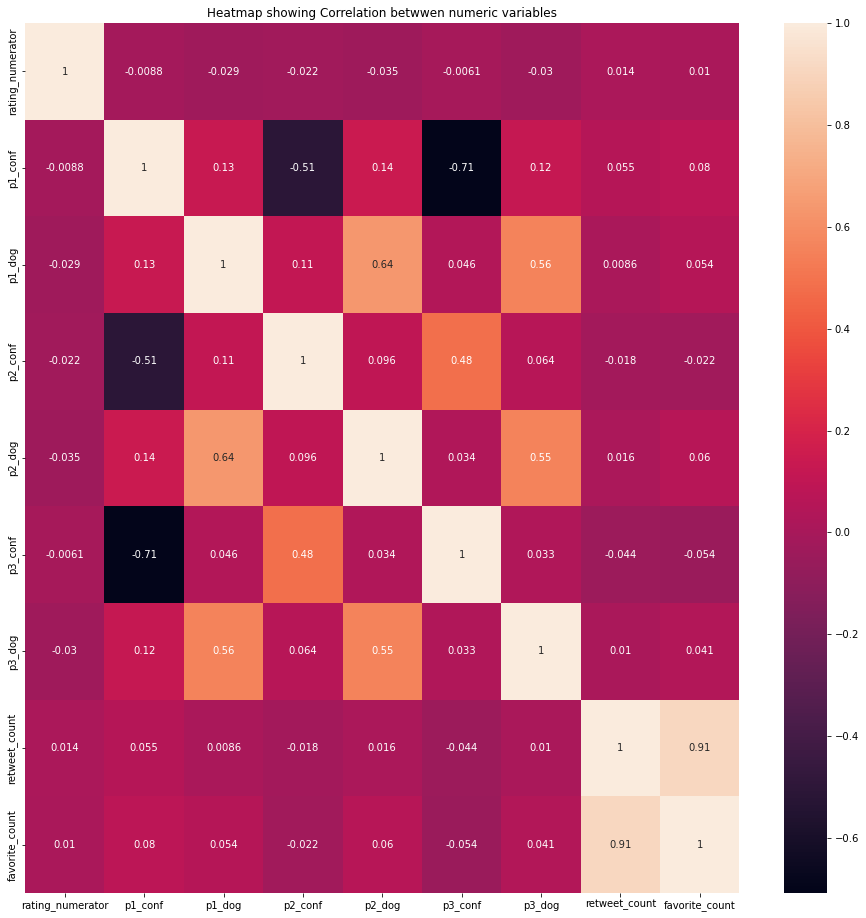

In [445]:
fig,ax = plt.subplots(figsize=(16, 16))
sns.heatmap(df.drop(['tweet_id','img_num','rating_denominator'], axis=1).corr(),annot=True, ax=ax)
ax.set_title("Heatmap showing Correlation betwwen numeric variables");

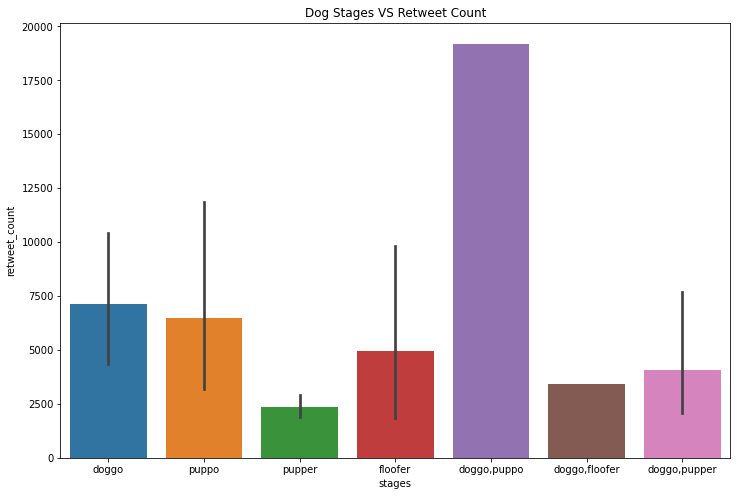

In [475]:
fig,ax = plt.subplots(figsize=(12, 8))
sns.barplot(x=df.stages, y=df.retweet_count)
ax.set_title("Dog Stages VS Retweet Count");

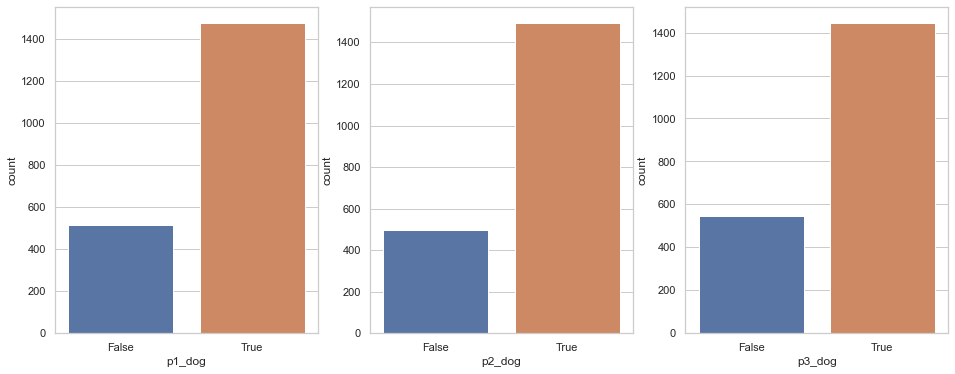

In [531]:
fig, axes = plt.subplots(1,3, figsize=(16, 6))

sns.countplot(ax=axes[0],x=df.p1_dog)
sns.countplot(ax=axes[1],x=df.p2_dog)
sns.countplot(ax=axes[2],x=df.p3_dog);

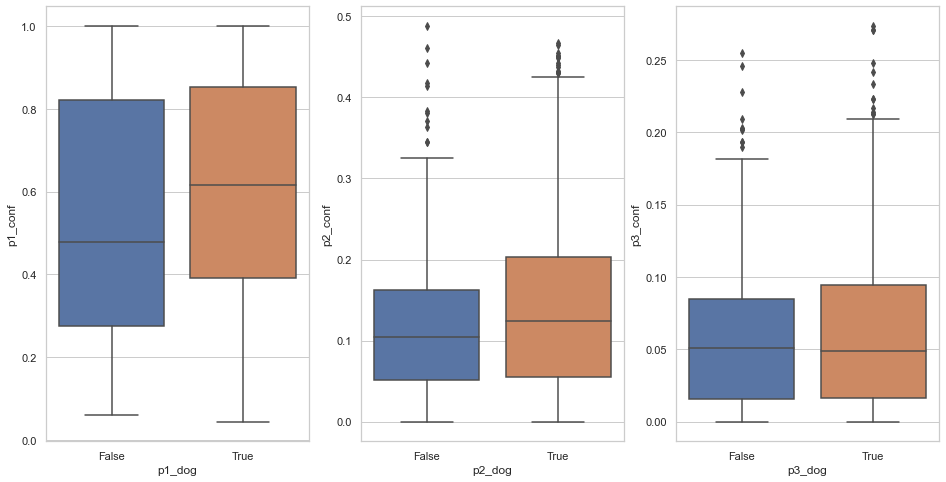

In [532]:
fig, axes = plt.subplots(1,3,figsize=(16,8))

sns.boxplot(ax=axes[0],x=df.p1_dog,y=df.p1_conf)
sns.boxplot(ax=axes[1],x=df.p2_dog,y=df.p2_conf)
sns.boxplot(ax=axes[2],x=df.p3_dog,y=df.p3_conf);


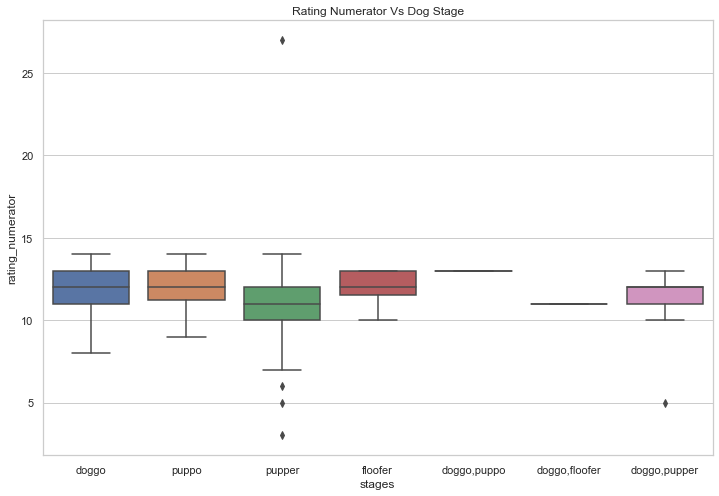

In [530]:
fig, ax = plt.subplots(figsize=(12,8))

sns.boxplot(x=df.stages,y=df.rating_numerator)
ax.set_title("Rating Numerator Vs Dog Stage");